In [106]:
import numpy as np
import pandas as pd
import datetime as datetime
from datetime import datetime
import requests
import os
import json
from dotenv import load_dotenv
import matplotlib
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [107]:
load_dotenv()

True

In [108]:
FMP_API_KEY = os.getenv('FMP_API_KEY')

In [109]:
# Specify stock ticker
company = 'TSM'
index = '^GSPC'

# Company Overview

In [110]:
url = f'https://financialmodelingprep.com/api/v3/profile/{company}?apikey={FMP_API_KEY}'
overview = requests.get(url).json()
overview = pd.DataFrame(overview)
overview = overview.set_index('symbol').T
overview

symbol,TSM
price,111.65
beta,1
volAvg,7967039
mktCap,579025829888
lastDiv,1.72511
range,80.61-142.2
changes,0.0299988
companyName,Taiwan Semiconductor Manufacturing Company Lim...
currency,USD
cik,0001046179


# Company Description

In [111]:
url = f'https://financialmodelingprep.com/api/v4/company-outlook?symbol={company}&apikey={FMP_API_KEY}'
overview = requests.get(url).json()
overview = overview['profile']['description']
overview

'Taiwan Semiconductor Manufacturing Company Limited manufactures and sells integrated circuits and semiconductors. It also offers customer service, account management, and engineering services. The company serves customers in computer, communications, consumer, and industrial and standard segments in North America, Europe, Japan, China, and South Korea. Taiwan Semiconductor Manufacturing Company Limited was founded in 1987 and is headquartered in HsinChu, Taiwan.'

# Company Performance

In [112]:
start = '2011-01-01'
end = '2021-09-28'

In [113]:
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{company}?apikey={FMP_API_KEY}&from={start}&to={end}'
historical = requests.get(url).json()
historical = pd.DataFrame.from_dict(historical, orient='index')
historical = historical[0][1]
historical = pd.DataFrame(historical)
historical['date'] = pd.to_datetime(historical['date'])
historical = historical.set_index('date')
historical['symbol'] = company
historical['daily_ret'] = historical['adjClose'].pct_change().dropna()
historical[:1]

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol,daily_ret
date,,,,,,,,,,,,,,
2021-09-28,114.33,115.04,111.85,111.9,111.9,9642665.0,9642665.0,-2.43,-2.125,112.93,"September 28, 21",-0.02125,TSM,NaN


In [114]:
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{index}?apikey={FMP_API_KEY}&from={start}&to={end}'
historical_sp = requests.get(url).json()
historical_sp = pd.DataFrame.from_dict(historical_sp, orient='index')
historical_sp = historical_sp[0][1]
historical_sp = pd.DataFrame(historical_sp)
historical_sp['date'] = pd.to_datetime(historical_sp['date'])
historical_sp = historical_sp.set_index('date')
historical_sp['symbol'] = index
historical_sp['daily_ret'] = historical_sp['adjClose'].pct_change().dropna()
historical_sp[:1]

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol,daily_ret
date,,,,,,,,,,,,,,
2021-09-28,4419.540039,4419.540039,4346.330078,4352.629883,4352.629883,3.495970e+09,3.495970e+09,-66.91016,-1.514,4372.83333,"September 28, 21",-0.01514,^GSPC,NaN


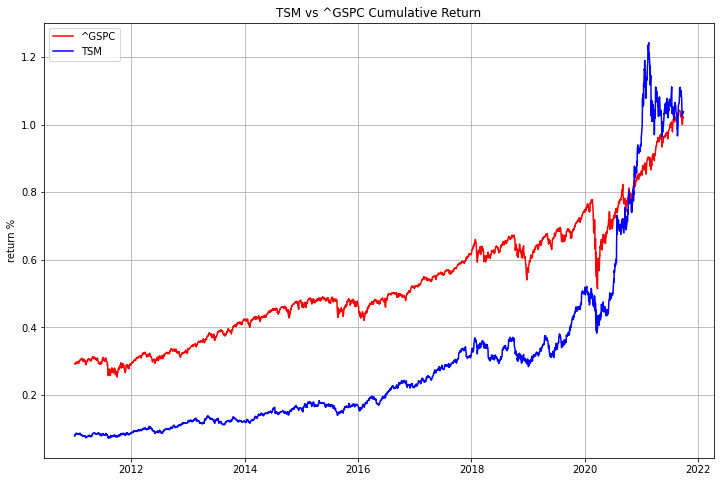

In [115]:
#Plot stock performance against S&P 500 index
fig, ax = plt.subplots(figsize=(12,8))
plt.plot((1+historical_sp['daily_ret']).cumprod(), label =f'{index}', color='r')
ax.set_title(f'{company} vs {index} Cumulative Return')
ax.set_ylabel('return %')
ax.legend(loc='upper left')
plt.grid()

plt.plot((1+historical['daily_ret']).cumprod(), label ='TSM', color='b')
ax.legend(loc='upper left')

# Industry P/E

In [ ]:
date = '2021-09-28' # change the date to latest or desired date
exchange = 'NYSE' # change to 'NASDAQ' to obtain P/E for that exchange

In [126]:
# Get industry P/E
url = f'https://financialmodelingprep.com/api/v4/industry_price_earning_ratio?date={date}&exchange={exchange}&apikey={FMP_API_KEY}'
industry_stats = requests.get(url).json()
industry_stats = pd.DataFrame(industry_stats)
industry_stats['date'] = pd.to_datetime(industry_stats['date'])
industry_stats= industry_stats.set_index('date')
industry_stats

,industry,exchange,pe
date,,,
2021-09-28,Auto Manufacturers,NYSE,127.246867382525863
2021-09-28,Banks—Diversified,NYSE,36.9370428643453366
2021-09-28,Closed-End Fund - Foreign,NYSE,5.53670508888888868
2021-09-28,Computer Hardware,NYSE,97.3310341395833092
2021-09-28,Drug Manufacturers—General,NYSE,59.7381698476190621
2021-09-28,Household & Personal Products,NYSE,29.2005698988763953
2021-09-28,Internet Content & Information,NYSE,41.4826796333333192
2021-09-28,Oil & Gas Midstream,NYSE,35.0959436498164976
2021-09-28,Other Industrial Metals & Mining,NYSE,48.5812542847328288


# Sector P/E

In [125]:
# Get sector P/E
url = f'https://financialmodelingprep.com/api/v4/sector_price_earning_ratio?date={date}&exchange={exchange}&apikey={FMP_API_KEY}'
sector_stats = requests.get(url).json()
sector_stats = pd.DataFrame(sector_stats)
sector_stats['date'] = pd.to_datetime(sector_stats['date'])
sector_stats= sector_stats.set_index('date')
sector_stats

,sector,exchange,pe
date,,,
2021-09-28,Basic Materials,NYSE,48.5812542847328288
2021-09-28,Communication Services,NYSE,41.4826796333333192
2021-09-28,Consumer Cyclical,NYSE,127.246867382525863
2021-09-28,Consumer Defensive,NYSE,29.2005698988763953
2021-09-28,Energy,NYSE,35.0959436498164976
2021-09-28,Financial Services,NYSE,36.9370428643453366
2021-09-28,Healthcare,NYSE,59.7381698476190621
2021-09-28,Industrials,NYSE,57.9168769069767251
2021-09-28,Real Estate,NYSE,81.831494499441348


In [137]:
# Print company, sector and industry P/E to compare and determine if over- or under-valued
company_candidate = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/value_investing/resources/research_candidate.csv')
company_candidate = company_candidate.set_index('Unnamed: 0')
company_pe = company_candidate['PE'][0]
print(f'{company} P/E = {company_pe}')

industry_pe = industry_stats.loc[industry_stats['industry'] == 'Computer Hardware']
sector_pe = sector_stats.loc[sector_stats['sector'] == 'Technology']

print(industry_pe)
print(sector_pe)

TSM P/E = 34.82752395503663
                     industry exchange                   pe
date                                                       
2021-09-28  Computer Hardware     NYSE  97.3310341395833092
                sector exchange                   pe
date                                                
2021-09-28  Technology     NYSE  97.3310341395833092


# Institutional Holders

In [160]:
# List of institutional holders
url = f'https://financialmodelingprep.com/api/v3/institutional-holder/{company}?apikey={FMP_API_KEY}'
institutional_holders = requests.get(url).json()
institutional_holders = pd.DataFrame(institutional_holders)
institutional_holders = institutional_holders.sort_values(by='shares',ascending=False)
print(institutional_holders[:20])

                                        holder    shares dateReported   change
1234                      SANDERS CAPITAL, LLC  40434002   2021-06-30  1391488
1233                   CAPITAL WORLD INVESTORS  35567322   2021-06-30  -708068
1232                       JPMORGAN CHASE & CO  35021753   2021-06-30 -1100952
1231           CAPITAL INTERNATIONAL INVESTORS  34607357   2021-06-30  1421474
1230              BANK OF NEW YORK MELLON CORP  34453724   2021-06-30  -617423
1229  MASSACHUSETTS FINANCIAL SERVICES CO /MA/  33364658   2021-06-30  -218353
1228              FISHER ASSET MANAGEMENT, LLC  25981273   2021-06-30  -658898
1227            WCM INVESTMENT MANAGEMENT, LLC  25822944   2021-06-30 -6119494
1226                        VANGUARD GROUP INC  21532029   2021-06-30 -1603011
1225                        FIERA CAPITAL CORP  15693545   2021-06-30  -209155
1224           WELLINGTON MANAGEMENT GROUP LLP  15326412   2021-06-30 -5526601
1223                            BLACKROCK INC.  1477

In [166]:
# Sum of the shares held by institutions and net change
institutional_holders.sum()

holder          SANDERS CAPITAL, LLCCAPITAL WORLD INVESTORSJPM...
shares                                                  867210058
dateReported    2021-06-302021-06-302021-06-302021-06-302021-0...
change                                                  -21491908
dtype: object